In [31]:
#TAREA 4 - ÁLGEBRA LINEAL
import numpy as np

In [32]:
#Ejercicio 3
class SistemasLineales:
    def __init__(self,A,b):
        self.A = A
        self.b = b

class Jacobi(SistemasLineales):
    def __init__(self,A,b,x):
        SistemasLineales.__init__(self,A,b)
        self.x = x
    def Resolver(self):
        x0 = np.copy(self.x)
        for it in range(0,1000):
            x_nuevo = np.copy(x0)
            for i in range(self.A.shape[0]):
                Suma = 0.
                for j in range(self.A.shape[1]):
                    if i != j:
                        Suma += self.A[i,j]*x0[j]
                        x_nuevo[i] = (self.b[i] - Suma)/self.A[i,i]
            if np.linalg.norm(np.dot(self.A,x_nuevo)-self.b) < 1e-16:
                break
            x0 = np.copy(x_nuevo)
        return x0, it

class GaussSeidel(SistemasLineales):
    def __init__(self,A,b,x):
        SistemasLineales.__init__(self,A,b)
        self.x = x
    def Resolver(self):
        x0 = np.copy(self.x)
        for it in range(0,1000):
            x_nuevo = np.copy(x0)
            for i in range(self.A.shape[0]):
                Suma = 0.
                for j in range(self.A.shape[1]):
                    if i != j:
                        Suma += self.A[i,j]*x_nuevo[j]
                        x_nuevo[i] = (self.b[i] - Suma)/self.A[i,i]
            if np.linalg.norm(np.dot(self.A,x_nuevo)-self.b) < 1e-16:
                break
            x0 = np.copy(x_nuevo)
        return x0, it
 


In [33]:
#Ejercicio 2 (Hacemos el 3 primero para usar el algoritmo y resolver el sistema de la clase)
A = np.array([[3.,-1.,-1.],[-1.,3.,1.],[2.,1.,4.]])
b = np.array([1.,3.,7.])
x0 = np.array([0.,0.,0.])
Solucion = GaussSeidel(A,b,x0)
Solucion.Resolver()

(array([1., 1., 1.]), 25)

In [34]:
#Ejercicio 4
def Multiplicador(A,B):
  # Nueva matriz
  C = np.zeros((A.shape[0],B.shape[1]))
  if A.shape[1] != B.shape[0]:
    return "Las matrices no son compatibles"
  else:
    for i in range(A.shape[1]):
      for j in range(B.shape[0]):
        # Producto interno entre filas y columnas
        C[i,j] = np.dot(A[i,:],B[:,j])
  return C
# Definamos nuestras matrices:
A = np.array([[1.,0.,0.],[5.,1.,0.],[-2.,3.,1.]])
B = np.array([[4.,-2.,1.],[0.,3.,7.],[0.,0.,-2.]])

Multiplicador(A,B)

array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 17.]])

In [35]:
# Ejercicio 8:
def Descomp(A):
  U = A
  L = np.zeros_like(A)
  for i in range(A.shape[0]):
    L[i,i] = 1
  for i in range(len(A[0])):
    for j in range(i+1,len(A[0])): # Paso para encontrar L y U
      a = A[j,i]/A[i,i]
      L[j,i] = a
      U[j,:] -= a*A[i,:]
  return L,U
A_LU = np.array([[4.,-2.,1.],[20.,-7.,12.],[-8.,13.,17.]])
Descomp(A_LU)

(array([[ 1.,  0.,  0.],
        [ 5.,  1.,  0.],
        [-2.,  3.,  1.]]),
 array([[ 4., -2.,  1.],
        [ 0.,  3.,  7.],
        [ 0.,  0., -2.]]))

In [36]:
#Ejercicio 10
#a)
def ValoresPropios(A):
    V = np.eye(A.shape[0])
    for it in range(1000):
        Mayor = 0
        posicion_mayor = (0,0)
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                if i!=j and np.abs(A[i,j])>Mayor:
                    Mayor = np.abs(A[i,j])
                    posicion_mayor = (i,j)
        if Mayor < 1e-16:
            break
        i,j = posicion_mayor
        if A[i,i] == A[j,j]:
            theta = np.pi/4
        else:
            theta = 0.5*np.arctan(2*A[i,j]/(A[i,i]-A[j,j]))
        R = np.eye(A.shape[0])
        R[i,i] = np.cos(theta)
        R[i,j] = -np.sin(theta)
        R[j,i] = np.sin(theta)
        R[j,j] = np.cos(theta)
        A = R.T@A@R
        V = V@R
    valores_propios = np.diagonal(A)
    return valores_propios, V


In [37]:
A = np.array([[4.,1.,1.],[1.,3.,2.],[1.,2.,5.]])
print(f"Los valores propios son {ValoresPropios(A)[0]} y la matriz de vectores propios es:")
ValoresPropios(A)[1]

Los valores propios son [3.39729507 1.70759841 6.89510652] y la matriz de vectores propios es:


array([[ 0.88573564, -0.17059871,  0.43170413],
       [-0.07589338,  0.86427949,  0.49725362],
       [-0.45794385, -0.47319874,  0.75257583]])

In [38]:
#b) 
print(f"Los valores propios con el paquete son {np.linalg.eig(A)[0]} y la matriz de vectores propios es:")
np.linalg.eig(A)[1]
#Dan los mismos eigenvalores y los mismos eigenvectores

Los valores propios con el paquete son [6.89510652 3.39729507 1.70759841] y la matriz de vectores propios es:


array([[ 0.43170413,  0.88573564,  0.17059871],
       [ 0.49725362, -0.07589338, -0.86427949],
       [ 0.75257583, -0.45794385,  0.47319874]])

In [39]:
#Ejercicio 12
F1 = (lambda x1, x2: np.log((x1**2 + x2**2)/(2*np.pi)) - np.sin(x1*x2),  
      lambda x1, x2: np.exp(x1-x2) + np.cos(x1*x2))
x0 = np.array([2.,2.])

F2 = (lambda x1, x2, x3: 6*x1 - 2*np.cos(x2*x3) - 1, 
      lambda x1, x2, x3: 9*x2 + np.sqrt(x1**2 + np.sin(x3) + 1.06) + 0.9, 
      lambda x1, x2, x3: 60*x3 + 3*np.exp(-x1*x2) + 10*np.pi - 3)

x1 = np.array([0.,0.,0.])

def GetJacobian(F,r,h=1e-6):
    n = len(r)
    J = np.zeros((n, n))
    F_actual = np.zeros(n)
    for i in range(n):
        F_actual[i] = F[i](*r)
    for i in range(n):
        for j in range(n):
            r_superior = r.copy()
            r_inferior = r.copy()
            
            r_superior[j] += h
            r_inferior[j] -= h

            F_superior = np.zeros(n)
            F_inferior = np.zeros(n)
            for k in range(n):
                F_superior[k] = F[k](*r_superior)
                F_inferior[k] = F[k](*r_inferior)

            J[i, j] = (F_superior[i] - F_inferior[i]) / (2 * h)
    return J


def GetNewtonMethod(F,J,x0,itmax=1000,precision=1e-8):
    error = 1
    it = 0
    x1 = x0.copy()
    while error > precision and it < itmax:
        try:
            F_actual = np.zeros(len(F))
            for i in range(len(F)):
                F_actual[i] = F[i](*x0)
            x1 = x0 - np.linalg.inv(J(F,x0))@F_actual
            error = np.linalg.norm(x1-x0)
        except np.linalg.LinAlgError:
            return None
        x0 = x1
        it += 1
    if it == itmax:
        return False
    else:
        return x0
print(f"La solución del primer sistema es {GetNewtonMethod(F1,GetJacobian,x0)}")
print(f"La solución del segundo sistema es {GetNewtonMethod(F2,GetJacobian,x1)}")

La solución del primer sistema es [1.77245385 1.77245385]
La solución del segundo sistema es [ 0.49814468 -0.1996059  -0.52882598]


In [40]:
#CON DESCENSO DEL GRADIENTE
def GetF(G,r):
  n = r.shape[0]
  v = np.zeros(n)
  for i in range(n):
    v[i] = G[i](*r)
  return v
def Metric(G,r):
  return 0.5*np.linalg.norm(GetF(G,r))**2
def DescensoGradiente(G,r,lr,epochs=int(1e4),error=1e-16):
  metric = 1
  it = 0
  R = np.array([r])
  while metric > error and it < epochs:
    J = GetJacobian(G,r).T
    Vector = GetF(G,r)
    r = r - lr*np.dot(J,Vector)
    R = np.vstack((R,r))
    metric = Metric(G,r)
    it += 1
  return r
print(f"La solución del primer sistema es {DescensoGradiente(F1,x0,1e-2)}")
print(f"La solución del segundo sistema es {DescensoGradiente(F2,x1,5*1e-4)}")

La solución del primer sistema es [1.77245384 1.77245386]
La solución del segundo sistema es [ 0.49814468 -0.1996059  -0.52882598]


In [41]:
#Ejercicio 13
#a)
def GetJacobianCuatro(F,r,h):
    m = len(F)
    n = len(r)
    J = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            r_1 = r.copy()
            r_2 = r.copy()
            r_3 = r.copy()
            r_4 = r.copy()
            
            r_1[j] += 2*h
            r_2[j] += h
            r_3[j] -= h
            r_4[j] -= 2*h

            F_1 = F[i](*r_1) 
            F_2 = F[i](*r_2)  
            F_3 = F[i](*r_3)  
            F_4 = F[i](*r_4)

            J[i, j] = (-F_1 + 8*F_2 - 8*F_3 + F_4) / (12 * h) #DERIVADA CENTRAL DE APROXIMACION DE ORDEN 4
    return J

In [42]:
#b)
GetJacobianCuatro(F2,np.array([0.5,0.5,0.5]),0.01)

array([[ 6.        ,  0.24740396,  0.24740396],
       [ 0.37377753,  9.        ,  0.32802064],
       [-1.16820117, -1.16820117, 60.        ]])

In [43]:
#c)
GetJacobian(F2,np.array([0.5,0.5,0.5]),0.01)

array([[ 6.        ,  0.24740293,  0.24740293],
       [ 0.37376854,  9.        ,  0.32801836],
       [-1.16820604, -1.16820604, 60.        ]])

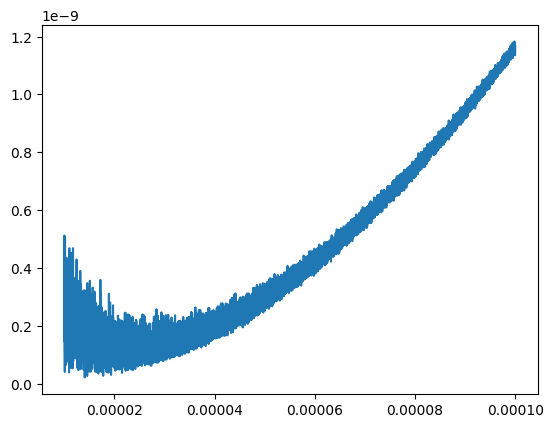

In [44]:
import matplotlib.pyplot as plt
h_values = np.linspace(0.00001,0.0001,10000)
errors = []
for h in h_values:
    J_cuatro = GetJacobianCuatro(F2, np.array([0.5,0.5,0.5]), h)
    J_dos = GetJacobian(F2, np.array([0.5,0.5,0.5]), h)
    error = np.linalg.norm(J_cuatro - J_dos)
    errors.append(error)
plt.plot(h_values,errors)

In [45]:
#Con base a la gráfica podemos intuir que ambas tienen la misma precisión en un valor de h algo menor
#a h=0.0002, ya que más o menos desde h=0.0001 la gráfica empieza a tener mucho ruido, indicando que
#el programa no logra distinguir bien entre ambas medidas de precisión de O(h2) y O(h4) en esta región.

In [46]:
#Ejercicio 14
import sympy as sym
Jx = sym.Matrix([[0,0,0],[0,0,-1],[0,1,0]])
Jy = sym.Matrix([[0,0,1],[0,0,0],[-1,0,0]])
Jz = sym.Matrix([[0,-1,0],[1,0,0],[0,0,0]])

def Conmutador(i,j):
    if i == 1:
        Ji = Jx
    if i == 2:
        Ji = Jy
    if i == 3:
        Ji = Jz
    if j == 1:
        Jj = Jx
    if j == 2:
        Jj = Jy
    if j == 3:
        Jj = Jz
    return Ji*Jj - Jj*Ji
    

def Levi_Civita(i,j,k):
    if (i,j,k) in [(1,2,3),(2,3,1),(3,1,2)]:
        return 1
    elif (i,j,k) in [(3,2,1),(1,3,2),(2,1,3)]:
        return -1
    else:
        return 0

def Algebra_Lie(i,j):
    k_posibles = {1, 2, 3} - {i, j} 
    k = k_posibles.pop()
    epsilon = Levi_Civita(i,j,k)
    if k==1:
        Jk=Jx
    elif k == 2:
        Jk=Jy
    else:
        Jk=Jz
    return epsilon*Jk

for i in range(1,4):
    for j in range(1,4):
        a=Algebra_Lie(i,j)
        c=Conmutador(i,j)
        if a == c:
            print(f"El algebra de Lie de SO3 para i={i},j={j} se cumple")
        else:
            print(f"El algebra de Lie de SO3 para i={i},j={j} no se cumple")


El algebra de Lie de SO3 para i=1,j=1 se cumple
El algebra de Lie de SO3 para i=1,j=2 se cumple
El algebra de Lie de SO3 para i=1,j=3 se cumple
El algebra de Lie de SO3 para i=2,j=1 se cumple
El algebra de Lie de SO3 para i=2,j=2 se cumple
El algebra de Lie de SO3 para i=2,j=3 se cumple
El algebra de Lie de SO3 para i=3,j=1 se cumple
El algebra de Lie de SO3 para i=3,j=2 se cumple
El algebra de Lie de SO3 para i=3,j=3 se cumple
